/tmp/ipython-input-12-1101973209.py:10: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv(file_path, index_col='Date', parse_dates=True)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ADF Test on 'Close':
ADF Statistic: -0.14845415724415056
p-value: 0.9443932993356198
   1%: -3.435651725648415
   5%: -2.863881223119536
   10%: -2.568016498910778


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Best SARIMAX order: (3, 1, 3)
Best AIC: 1086.8976336743672
Train RMSE: 0.47465156237929185
Test RMSE: 21.536398400172274
MSE: 4.2825379023333685
RMSE: 2.0694293663552203


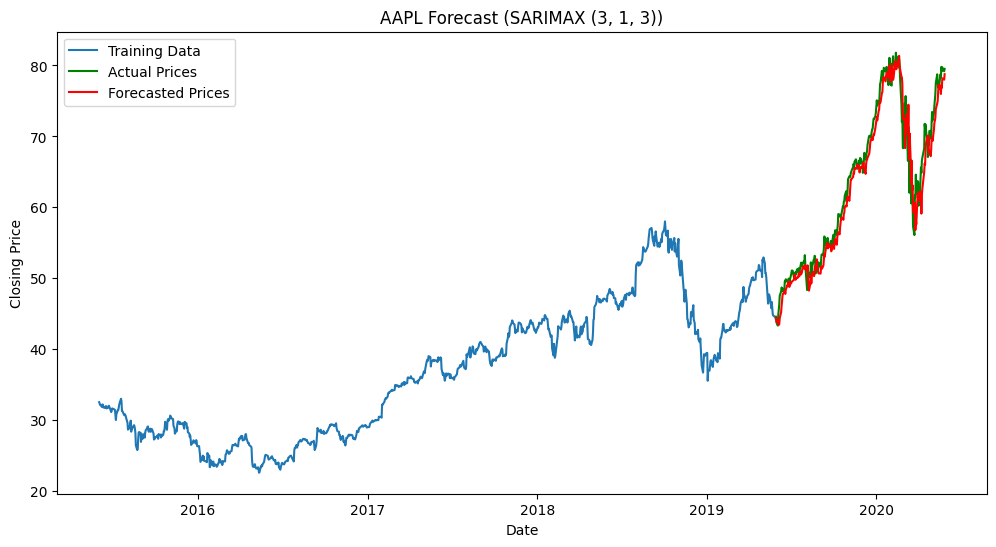

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Load data
file_path = "/content/AAPL.csv"# Adjust path as needed
df = pd.read_csv(file_path, index_col='Date', parse_dates=True)
df = df[['Close']]

# Feature engineering
df['Lag_1'] = df['Close'].shift(1)
df['Rolling_Mean_5'] = df['Close'].rolling(window=5).mean()
df['Expanding_Mean'] = df['Close'].expanding().mean()
df = df.dropna()

# ADF test
def test_stationarity(ts):
    result = adfuller(ts)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    for key, value in result[4].items():
        print(f'   {key}: {value}')

print("ADF Test on 'Close':")
test_stationarity(df['Close'])

# Train-test split
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Model selection loop
best_aic = np.inf
best_order = None
best_model = None

for p in range(0, 4):
    for d in range(1, 3):
        for q in range(0, 4):
            try:
                model = SARIMAX(train['Close'],
                                exog=train[['Lag_1', 'Rolling_Mean_5', 'Expanding_Mean']],
                                order=(p, d, q),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
                result = model.fit(disp=False)
                if result.aic < best_aic:
                    best_aic = result.aic
                    best_order = (p, d, q)
                    best_model = result
            except:
                continue

print("Best SARIMAX order:", best_order)
print("Best AIC:", best_aic)

# Forecast
forecast = best_model.forecast(steps=len(test), exog=test[['Lag_1', 'Rolling_Mean_5', 'Expanding_Mean']])

train_pred = best_model.predict(start=train.index[0], end=train.index[-1],
                                exog=train[['Lag_1', 'Rolling_Mean_5', 'Expanding_Mean']])
train_rmse = np.sqrt(mean_squared_error(train['Close'], train_pred))

print("Train RMSE:", train_rmse)
print("Test RMSE:", rmse)


# Evaluation
mse = mean_squared_error(test['Close'], forecast)
rmse = np.sqrt(mse)
print("MSE:", mse)
print("RMSE:", rmse)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Close'], label='Training Data')
plt.plot(test.index, test['Close'], label='Actual Prices', color='green')
plt.plot(test.index, forecast, label='Forecasted Prices', color='red')
plt.title(f'AAPL Forecast (SARIMAX {best_order})')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


/tmp/ipython-input-5-1530099634.py:11: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data = pd.read_csv(file_path, index_col='Date', parse_dates=True)


Initial stationarity test:
ADF Statistic: -0.13291441061439546
p-value: 0.9460598368757791
   1%: -3.435634587707382
   5%: -2.8638736617392837
   10%: -2.568012472034339

Stationarity test after differencing:
ADF Statistic: -6.317999287826557
p-value: 3.1160168841271756e-08
   1%: -3.435634587707382
   5%: -2.8638736617392837
   10%: -2.568012472034339


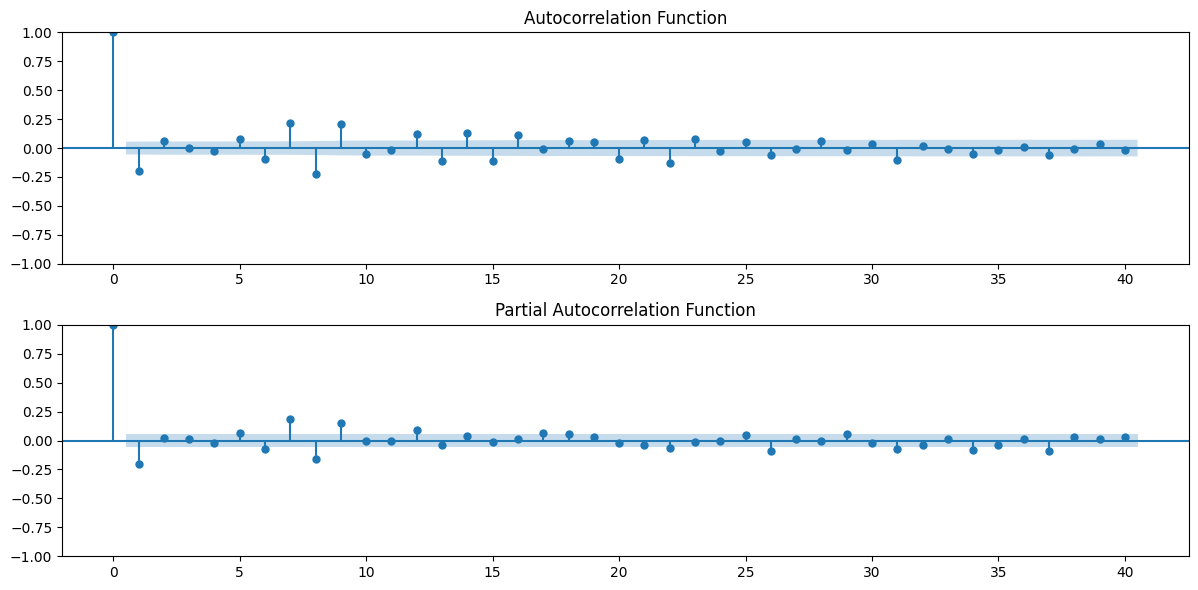

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/di

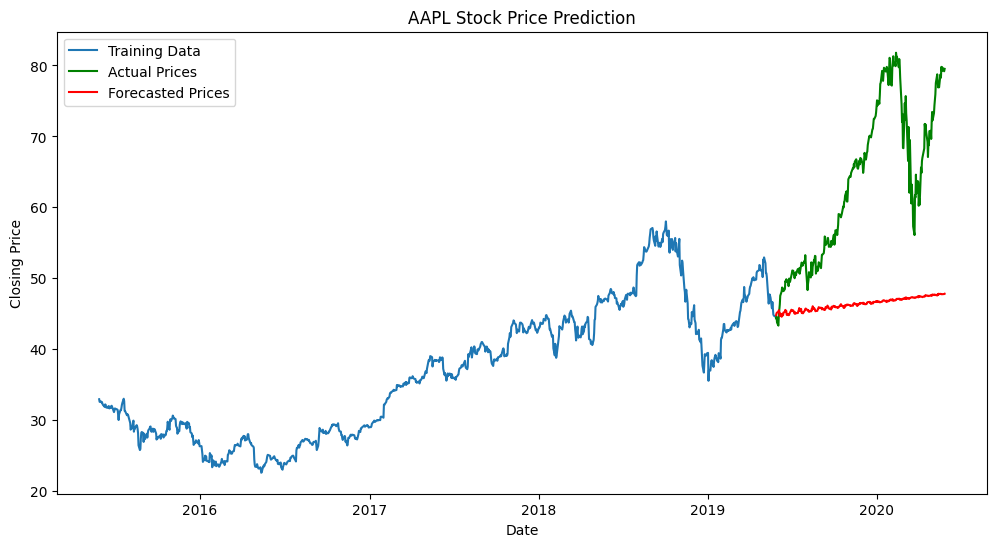

(387.1396419457751, np.float64(19.67586445231251))

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf



file_path =  "/content/AAPL.csv"
data = pd.read_csv(file_path, index_col='Date', parse_dates=True)
data = data['Close']

# Check stationarity function
def test_stationarity(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    for key, value in result[4].items():
        print(f'   {key}: {value}')

# Initial stationarity test
print("Initial stationarity test:")
test_stationarity(data)

# Differencing if not stationary
data_diff = data.diff().dropna()
print("\nStationarity test after differencing:")
test_stationarity(data_diff)

# Plot of ACF and PACF
plt.figure(figsize=(12, 6))

plt.subplot(211)
plot_acf(data_diff, ax=plt.gca(), lags=40)
plt.title('Autocorrelation Function')

plt.subplot(212)
plot_pacf(data_diff, ax=plt.gca(), lags=40)
plt.title('Partial Autocorrelation Function')

plt.tight_layout()
plt.show()

# Preprocess the data
#df['Date'] = pd.to_datetime(df['Date'])
#df.set_index('Date', inplace=True)
#close_prices = df['Close']

train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

# ARIMA Model
model = ARIMA(train_data, order=(19, 2, 23))
fitted_model = model.fit()

forecast_steps = len(test_data)
forecast = fitted_model.forecast(steps=forecast_steps)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Actual Prices', color='green')
plt.plot(test_data.index, forecast, label='Forecasted Prices', color='red')
plt.title('AAPL Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# performance metrics
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_data, forecast)
rmse = np.sqrt(mse)

mse, rmse


/tmp/ipython-input-4-1685179243.py:11: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data = pd.read_csv(file_path, index_col='Date', parse_dates=True)


Initial stationarity test:
ADF Statistic: -0.13291441061439546
p-value: 0.9460598368757791
   1%: -3.435634587707382
   5%: -2.8638736617392837
   10%: -2.568012472034339

Stationarity test after differencing:
ADF Statistic: -6.317999287826557
p-value: 3.1160168841271756e-08
   1%: -3.435634587707382
   5%: -2.8638736617392837
   10%: -2.568012472034339


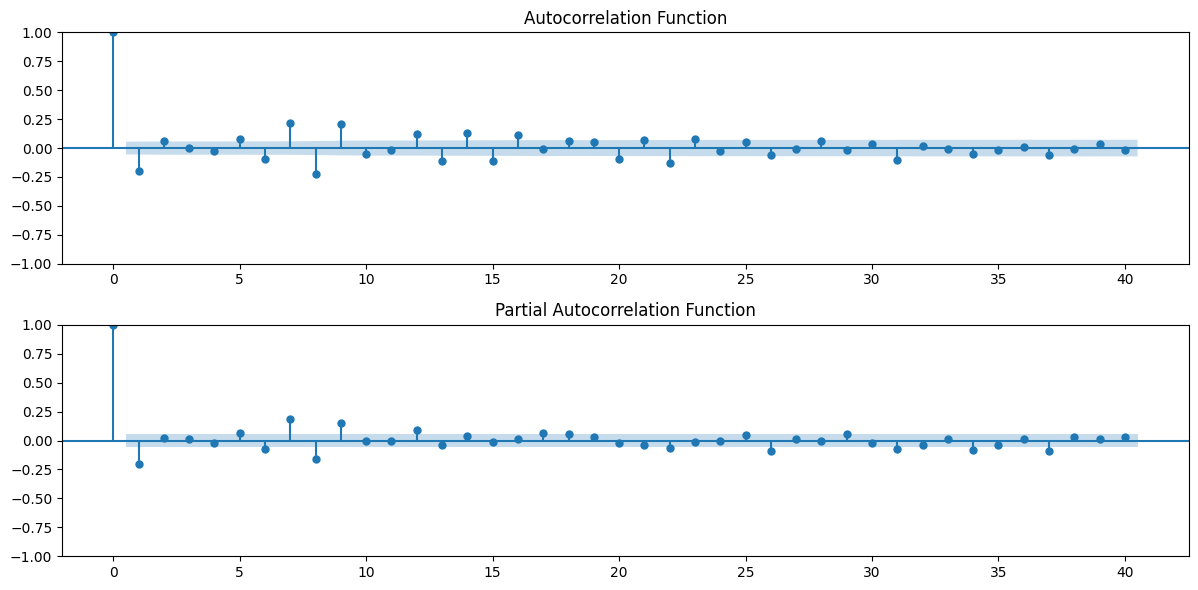

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



Best ARIMA order by AIC: (3, 1, 2) (AIC: 1842.0700216705527)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


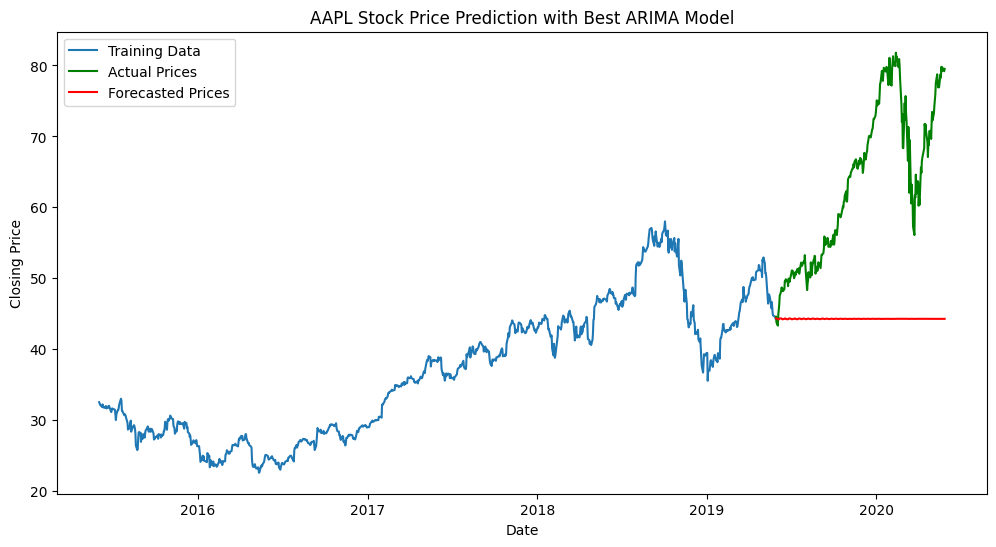

(478.59571538858205,
 np.float64(21.876830560860093),
 (3, 1, 2),
 np.float64(1842.0700216705527))

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
file_path = "/content/AAPL.csv"
data = pd.read_csv(file_path, index_col='Date', parse_dates=True)
data = data['Close']

# Stationarity check
def test_stationarity(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    for key, value in result[4].items():
        print(f'   {key}: {value}')

# Initial test
print("Initial stationarity test:")
test_stationarity(data)

# Differencing to achieve stationarity
data_diff = data.diff().dropna()
print("\nStationarity test after differencing:")
test_stationarity(data_diff)

# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(data_diff, ax=plt.gca(), lags=40)
plt.title('Autocorrelation Function')

plt.subplot(212)
plot_pacf(data_diff, ax=plt.gca(), lags=40)
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

# Create lag, rolling, and expanding features
df_features = pd.DataFrame({
    'Close': data,
    'Lag_1': data.shift(1),
    'Rolling_Mean_5': data.rolling(window=5).mean(),
    'Expanding_Mean': data.expanding().mean()
}).dropna()

# Split data
train_size = int(len(df_features) * 0.8)
train_data, test_data = df_features[:train_size], df_features[train_size:]

# Model selection using AIC/BIC
best_aic = np.inf
best_order = None
best_model = None

# Trying a small range for faster execution; can expand for better tuning
for p in range(0, 4):
    for d in range(1, 3):
        for q in range(0, 4):
            try:
                model = ARIMA(train_data['Close'], order=(p, d, q))
                fitted = model.fit()
                if fitted.aic < best_aic:
                    best_aic = fitted.aic
                    best_order = (p, d, q)
                    best_model = fitted
            except:
                continue

print(f"\nBest ARIMA order by AIC: {best_order} (AIC: {best_aic})")

# Forecast
forecast_steps = len(test_data)
forecast = best_model.forecast(steps=forecast_steps)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Close'], label='Training Data')
plt.plot(test_data.index, test_data['Close'], label='Actual Prices', color='green')
plt.plot(test_data.index, forecast, label='Forecasted Prices', color='red')
plt.title('AAPL Stock Price Prediction with Best ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# Evaluation
mse = mean_squared_error(test_data['Close'], forecast)
rmse = np.sqrt(mse)

mse, rmse, best_order, best_aic